In [24]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib.dates import DateFormatter
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import math

ds = Dataset("/home/sps/Desktop/doppler_radar/NETCDF5_kochi_weather_2019_05_21_00_04_29.nc")


masked_array(data=[ 0.5,  1. ,  2. ,  3. ,  4.5,  6. ,  9. , 12. , 16. ,
                   21. ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [4]:
#ds= xr.open_dataset('/home/sps/Desktop/paper3/doppler/NETCDF5_kochi_weather_2019_05_21_00_04_29.nc')

data1=ds['siteLat'][:]
data2=ds['siteLon'][:]
data3=ds['siteAlt'][:]
data4=ds['firstgateRange'][:]
data5=ds['radialElev'][:]
data6=ds['radialAzim'][:]
data7=ds['elevationList'][:]



#print (data3)


#data4=ds['gateSize']
#print (data4)

#data5=ds['radialElev']
#print (data5)


data1=ds['Z'][1,:,:]
#print (data1)
#data=data1.mask(data1 > 50)

#data=data1.where(data1>0)


#N = 360


#fig = plt.figure(figsize=(12, 6))
#ax = fig.add_subplot(111, projection='polar')

# parameters for the model --------------------------------------

pi      = 3.14
Delta_S = 300.0 #meters
S1      = 0.0   #meters
n       = 800   # nodim
Theta   = 1.0 * (pi/180.0)  #data7 #in radian
h_r     = 10.0         # Radar ht. in m.
R       = 6371*1000       # Radius of earth in m.
lon_rad = 76             # Radar latitude   #DOUBT -----> radian or degree??????
Psi     =  361 * (pi/180.0)                         # Azhimuth angle in radian  * (pi/180.0) *(pi/180.0)
lat_rad = 10
#----------------------------------------------------------------


# Calculation of altitude of observation point based on S and theta

result_s       = []
result_h       = []
result_s2      = []
result_lon_obs = []
result_lat_obs = []

for i in range(1,801):
    S = S1+(Delta_S*i)  #S1 = first range bin, Delta_S == Distance b/w bins
    h = (((S)**2 + ((4/3)*R)**2 + 2*S*(4/3)*R*math.sin(Theta))**0.5-((4/3)*R) + (h_r/1000))
    s_2 =(4/3)*R*math.asin(S*math.cos(Theta)/(((4/3)*R)+h_r))
    lon_obs = lon_rad  + ((180/pi) * (s_2/R) * math.cos (Psi)) 
    lat_obs= lat_rad + (180/pi)*(math.asin(math.sin(Psi)* math.sin(s_2/R)/math.cos(lon_obs*(pi/180))))
  
    result_s.append(S) 
    result_h.append(h)
    result_s2.append(s_2)
    result_lon_obs.append(lon_obs)
    result_lat_obs.append(lat_obs)
    
    

# CALCULATION OF LAT AND LON




# print (result_lat_obs)

In [26]:
ds['radialAzim'][:]


masked_array(data=[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,
                     9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
                    18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
                    27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
                    36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
                    45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
                    54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,
                    63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
                    72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
                    81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
                    90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
                    99., 100., 101., 102., 103., 104., 105., 106., 107.,
                   108., 109., 110., 111., 112., 113., 114., 115., 116.,
                   117., 118., 119., 120., 121., 12

In [84]:
#ds= xr.open_dataset('/home/sps/Desktop/paper3/doppler/NETCDF5_kochi_weather_2019_05_21_00_04_29.nc')

data1=ds['siteLat'][:]
data2=ds['siteLon'][:]
data3=ds['siteAlt'][:]
data4=ds['firstgateRange'][:]
rad_elv=ds['radialElev'][:]
azm_ang=ds['radialAzim'][:]
elv_ang=ds['elevationList'][:]



#print (data3)


#data4=ds['gateSize']
#print (data4)

#data5=ds['radialElev']
#print (data5)


#data1=ds['Z'][1,:,:]
#print (data1)
#data=data1.mask(data1 > 50)

#data=data1.where(data1>0)


#N = 360


#fig = plt.figure(figsize=(12, 6))
#ax = fig.add_subplot(111, projection='polar')

# parameters for the model --------------------------------------

pi      = 3.14
Delta_S = 300.0 #meters
S1      = 0.0   #meters
n       = 800   # nodim
h_r     = 0.5#10.0         # Radar ht. in m.
R       = 6371*1000       # Radius of earth in m.
lon_rad = 76             # Radar latitude   #DOUBT -----> radian or degree??????
lat_rad = 10
#----------------------------------------------------------------
#Theta   = 1.0 * (pi/180.0)  #data7 #in radian
#Psi     =  361 * (pi/180.0)                         # Azhimuth angle in radian  * (pi/180.0) *(pi/180.0)
#n
# Calculation of altitude of observation point based on S and theta


result_s       = np.zeros((10,360,800))
result_h       =  np.zeros((10,360,800))
result_s2      =  np.zeros((10,360,800))
result_lon_obs =  np.zeros((10,360,800))
result_lat_obs =  np.zeros((10,360,800))
for k in range(10):
    Theta   =  elv_ang[k]* (pi/180.0)  #data7 #in radian
    for j in range(360):
        Psi     =  azm_ang[j] * (pi/180.0)
        for i in range(800):
            S = S1+(Delta_S*i)  #S1 = first range bin, Delta_S == Distance b/w bins
            h = (((S)**2 + ((4/3)*R)**2 + 2*S*(4/3)*R*math.sin(Theta))**0.5-((4/3)*R) + (h_r/1000))
            s_2 =(4/3)*R*math.asin(S*math.cos(Theta)/(((4/3)*R)+h_r))
            lon_obs = lon_rad  + ((180/pi) * (s_2/R) * math.cos (Psi)) 
            lat_obs= lat_rad + (180/pi)*(math.asin(math.sin(Psi)* math.sin(s_2/R)/math.cos(lon_obs*(pi/180))))

            result_s[k,j,i] =S
            result_h[k,j,i] =h
            result_s2[k,j,i] =s_2
            result_lon_obs[k,j,i] =lon_obs
            result_lat_obs[k,j,i] =lat_obs

                
                
#             result_s.append(S) 
#             result_h.append(h)
#             result_s2.append(s_2)
#             result_lon_obs.append(lon_obs)
#             result_lat_obs.append(lat_obs)
    
    

# CALCULATION OF LAT AND LON




# print (result_lat_obs)

<ipython-input-85-958fc615b77f>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(theta, r, values,cmap=plt.cm.jet,vmin =0, vmax =40)


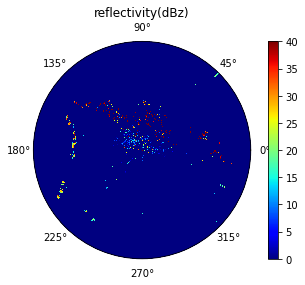

In [85]:
a= np.radians(np.linspace(0, 360, 360))
b = np.arange(0, 800, 1)
 
r, theta = np.meshgrid(b,a)
values =ds['Z'][0,:,:]
 
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
#ax.contourf(theta, r, values)
 


plt.pcolormesh(theta, r, values,cmap=plt.cm.jet,vmin =0, vmax =40)
# #cbar = plt.colorbar(cs, shrink=0.5)
# #cbar.set_clim(-30, 45)data1
plt.title('reflectivity(dBz)')
formatter = DateFormatter('%d')
#plt.xticks([])
plt.yticks([])
# #plt.ylim(0,20)
plt.colorbar()

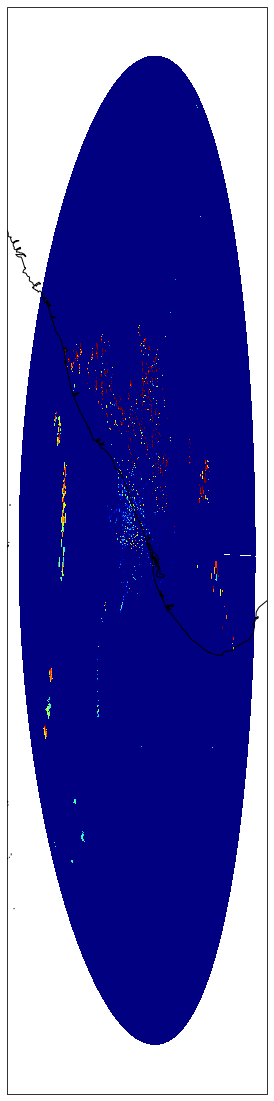

In [86]:
import cartopy.crs as ccrs
plt.figure(figsize=(10,20))
ax =plt.axes(projection=ccrs.PlateCarree())

ax.pcolormesh(result_lon_obs[1,:,:],result_lat_obs[1,:,:],ds['Z'][1,:,:],cmap='jet',vmin =0, vmax =40,transform=ccrs.PlateCarree())
ax.coastlines()


<ipython-input-87-f7ee9c47d037>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(result_lon_obs[1,:,:],result_lat_obs[1,:,:],ds['Z'][1,:,:],cmap='jet',vmin =0, vmax =40)


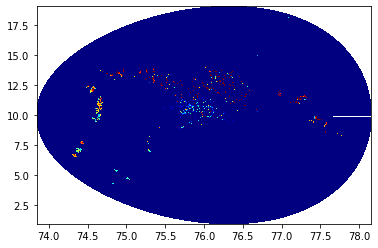

In [87]:
plt.pcolormesh(result_lon_obs[1,:,:],result_lat_obs[1,:,:],ds['Z'][1,:,:],cmap='jet',vmin =0, vmax =40)

In [72]:

print (lat_obs)

1.3345000000000002


In [46]:
PI = np.pi
def antenna_to_cartesian(ranges, azimuths, elevations):
    """
    Return Cartesian coordinates from antenna coordinates.

    Parameters
    ----------
    ranges : array
        Distances to the center of the radar gates (bins) in kilometers.
    azimuths : array
        Azimuth angle of the radar in degrees.
    elevations : array
        Elevation angle of the radar in degrees.

    Returns
    -------
    x, y, z : array
        Cartesian coordinates in meters from the radar.

    Notes
    -----
    The calculation for Cartesian coordinate is adapted from equations
    2.28(b) and 2.28(c) of Doviak and Zrnic [1]_ assuming a
    standard atmosphere (4/3 Earth's radius model).

    .. math::

        z = \\sqrt{r^2+R^2+2*r*R*sin(\\theta_e)} - R

        s = R * arcsin(\\frac{r*cos(\\theta_e)}{R+z})

        x = s * sin(\\theta_a)

        y = s * cos(\\theta_a)

    Where r is the distance from the radar to the center of the gate,
    :math:`\\theta_a` is the azimuth angle, :math:`\\theta_e` is the
    elevation angle, s is the arc length, and R is the effective radius
    of the earth, taken to be 4/3 the mean radius of earth (6371 km).

    References
    ----------
    .. [1] Doviak and Zrnic, Doppler Radar and Weather Observations, Second
        Edition, 1993, p. 21.

    """
    theta_e = elevations * np.pi / 180.0    # elevation angle in radians.
    theta_a = azimuths * np.pi / 180.0      # azimuth angle in radians.
    R = 6371.0 * 1000.0 * 4.0 / 3.0     # effective radius of earth in meters.
    r = ranges * 1000.0                 # distances to gates in meters.

    z = (r ** 2 + R ** 2 + 2.0 * r * R * np.sin(theta_e)) ** 0.5 - R
    s = R * np.arcsin(r * np.cos(theta_e) / (R + z))  # arc length in m.
    x = s * np.sin(theta_a)
    y = s * np.cos(theta_a)
    return x, y, z

In [53]:
#ds= xr.open_dataset('/home/sps/Desktop/paper3/doppler/NETCDF5_kochi_weather_2019_05_21_00_04_29.nc')

data1=ds['siteLat'][:]
data2=ds['siteLon'][:]
data3=ds['siteAlt'][:]
data4=ds['firstgateRange'][:]
rad_elv=ds['radialElev'][:]
azm_ang=ds['radialAzim'][:]
elv_ang=ds['elevationList'][:]


# parameters for the model --------------------------------------

pi      = 3.14
Delta_S = 300.0 #meters
S1      = 0.0   #meters
n       = 800   # nodim
h_r     = 10.0         # Radar ht. in m.
R       = 6371*1000       # Radius of earth in m.
lon_rad = 76             # Radar latitude   #DOUBT -----> radian or degree??????
lat_rad = 10


result_s       = np.zeros((10,360,800))
result_h       =  np.zeros((10,360,800))
result_s2      =  np.zeros((10,360,800))
result_lon_obs =  np.zeros((10,360,800))
result_lat_obs =  np.zeros((10,360,800))
for k in range(10):
    Theta   =  elv_ang[k]* (pi/180.0)  #data7 #in radian
    for j in range(360):
        Psi     =  azm_ang[j] * (pi/180.0)
        for i in range(800):
            ranges = S1+(Delta_S*i)  #S1 = first range bin, Delta_S == Distance b/w bins
            x, y, z = antenna_to_cartesian(ranges, Psi, Theta)
            result_h[k,j,i] =z
            result_lon_obs[k,j,i] =lon_rad+x
            result_lat_obs[k,j,i] =lat_rad+y

                

<ipython-input-54-f7ee9c47d037>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(result_lon_obs[1,:,:],result_lat_obs[1,:,:],ds['Z'][1,:,:],cmap='jet',vmin =0, vmax =40)


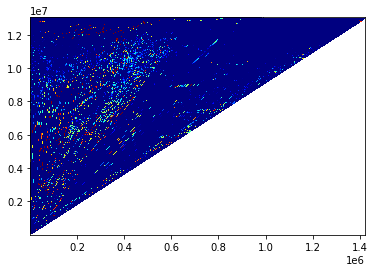

In [54]:
plt.pcolormesh(result_lon_obs[1,:,:],result_lat_obs[1,:,:],ds['Z'][1,:,:],cmap='jet',vmin =0, vmax =40)

<ipython-input-17-409f23a778af>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data1=ds['siteLat'][:]
<ipython-input-17-409f23a778af>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data2=ds['siteLon'][:]
<ipython-input-17-409f23a778af>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `b

9.9263
76.2622
30.0
<class 'netCDF4._netCDF4.Variable'>
float32 firstgateRange()
    units: meter
    long_name: Range to 1st gate
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used


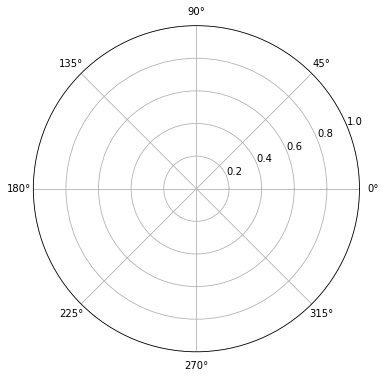

<ipython-input-22-2af98633fa35>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(theta, r, values,cmap=plt.cm.jet,vmin =0, vmax =40)


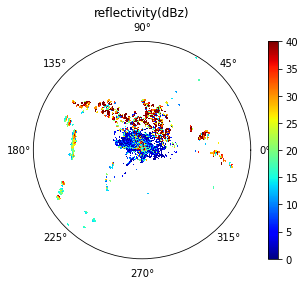

In [22]:
a = np.radians(np.linspace(0, 360, 360))
b = np.arange(0, 800, 1)
 
r, theta = np.meshgrid(b,a)
values =data
 
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
#ax.contourf(theta, r, values)
 


plt.pcolormesh(theta, r, values,cmap=plt.cm.jet,vmin =0, vmax =40)
# #cbar = plt.colorbar(cs, shrink=0.5)
# #cbar.set_clim(-30, 45)data1
plt.title('reflectivity(dBz)')
# formatter = DateFormatter('%d')
#plt.xticks([])
plt.yticks([])
# #plt.ylim(0,20)
plt.colorbar()
plt.savefig('/home/sps/Desktop/radarreflectivity.jpg',dpi=700) 